In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

# Heart Disease Prediction
### 1. Get-to-know

In [3]:
# loading the data from csv file to a Panda Dataframe
path = '/Users/kaylakim/Documents/TheUnicornTwins/TUT.Projects/MedicalPros/HeartDisease/'
heart_data = pd.read_csv(path + 'heart_disease_data.csv')

# printing the first 5 rows of the dataframe
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0, 0.5, 'target')

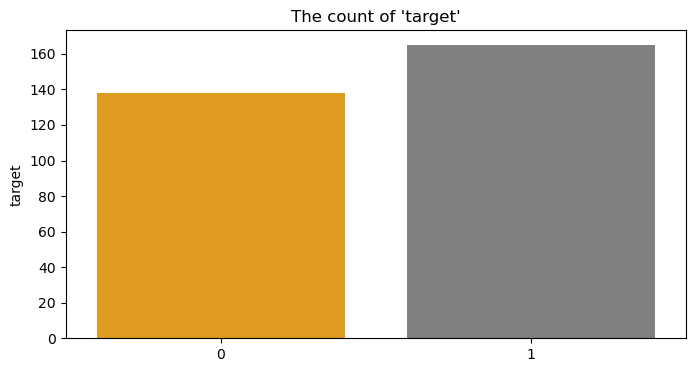

In [9]:
# Set the width and height of the figure
plt.figure(figsize=(8,4))

# Add title
plt.title("The count of 'target'")

# Bar chart
sns.barplot(x=heart_data['target'].value_counts().index, y=heart_data['target'].value_counts(),
            palette=['orange', 'grey'])

# Add label for vertical axis
plt.ylabel("target")

In [10]:
import plotly.express as px
fig = px.bar(heart_data, x=heart_data.target.value_counts(),
             y=heart_data.target.value_counts(),
             color=[1, 0])
fig.show()

### 2. Clean data
- Our data has not any missing value but we have to deal with outliers.

In [11]:
def outliers_of(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    #Number of upper outliers
    num_out_upper = data[data[name_of_col] > (Q3 + 1.5*IQR)].shape[0]
    print(f"The number of upper outliers= {num_out_upper}\n")

    #Number of lower outliers
    num_out_lower = data[data[name_of_col] < (Q1 - 1.5*IQR)].shape[0]
    print(f"The number of lower outliers= {num_out_lower}\n")

    #Percentage of outliers
    outliers_per = (num_out_upper + num_out_lower)/data.shape[0]
    print(f"The percentage of outliers= {round(outliers_per, 3)*100}%")

def remove_upper_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] < (Q3 + 1.5*IQR)]

def remove_lower_outliers(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    return data[data[name_of_col] > (Q1 - 1.5*IQR)]

- - #### 'trestbps'

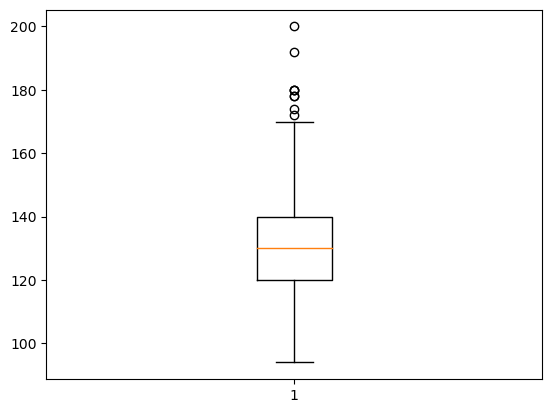

In [12]:
plt.boxplot(heart_data['trestbps'])
plt.show()

In [13]:
outliers_of(heart_data, 'trestbps')

The number of upper outliers= 9

The number of lower outliers= 0

The percentage of outliers= 3.0%


In [14]:
heart_data = remove_upper_outliers(heart_data, 'trestbps')
heart_data.shape

(290, 14)

In [15]:
outliers_of(heart_data, 'trestbps')

The number of upper outliers= 0

The number of lower outliers= 0

The percentage of outliers= 0.0%


- - #### 'chol'

In [16]:
heart_data = remove_upper_outliers(heart_data, 'chol')
heart_data.shape

(285, 14)

In [17]:
outliers_of(heart_data, 'chol')

The number of upper outliers= 0

The number of lower outliers= 0

The percentage of outliers= 0.0%


- - #### 'oldpeak'

In [18]:
heart_data = remove_upper_outliers(heart_data, 'oldpeak')
heart_data.shape

(280, 14)

In [19]:
outliers_of(heart_data, 'oldpeak')

The number of upper outliers= 0

The number of lower outliers= 0

The percentage of outliers= 0.0%


### 3. Refine data
>We will use the Random Forest to define the important features at first.
#### Separating the features & Target

In [20]:
X = heart_data.drop(columns='target', axis=1)
y = heart_data.target

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                      stratify=y, random_state=2)

#### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
imp_features = pd.Series(model.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)
imp_features

thalach     0.137997
oldpeak     0.128480
thal        0.127226
ca          0.106488
cp          0.101621
age         0.096817
chol        0.078388
trestbps    0.068021
slope       0.051037
exang       0.043646
sex         0.026551
restecg     0.024189
fbs         0.009539
dtype: float64

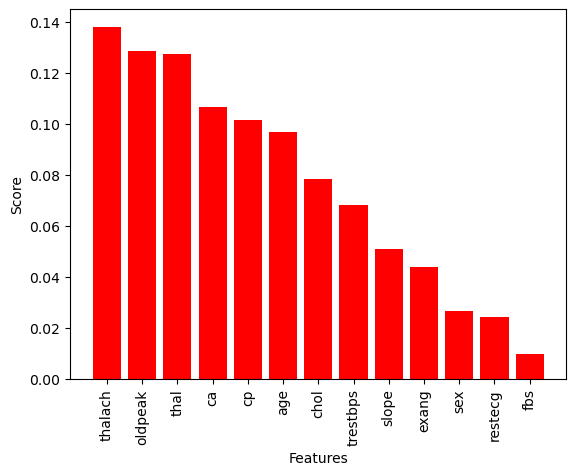

In [23]:
plt.bar(imp_features.index, imp_features, color="r")
plt.xlabel("Features")
plt.ylabel("Score")
plt.xticks(rotation='vertical')
plt.show()

In [24]:
print(f'MAE= {mean_absolute_error(y_valid, y_pred)}')
# accuracy score on the valid data
print(f'\nAccuracy score of valid data= {accuracy_score(y_valid, y_pred)}')
# accuracy score on the training data
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data= {accuracy_score(y_train, y_train_pred)}')
print(f'\nThe valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')
print(f'\nThe confusion matrix:\n {confusion_matrix(y_valid, y_pred)}')
print(classification_report(y_valid, y_pred))
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

MAE= 0.21428571428571427

Accuracy score of valid data= 0.7857142857142857
Accuracy score of training data= 1.0

The valid score of valid data= 78.57142857142857%
The train score of training data= 100.0%

The confusion matrix:
 [[18  6]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        24
           1       0.81      0.81      0.81        32

    accuracy                           0.79        56
   macro avg       0.78      0.78      0.78        56
weighted avg       0.79      0.79      0.79        56

Precision= 0.8125
Recall= 0.8125


## Data Standardization
### Log Normalization
- If we want to find out whether or not we should use Log Normalization, we should calculate the variance of variables, then compare them.  

In [25]:
for i in X.columns:
    print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

The variance of 'age'= 
				84.854
The variance of 'sex'= 
				0.211
The variance of 'cp'= 
				1.043
The variance of 'trestbps'= 
				216.096
The variance of 'chol'= 
				1986.149
The variance of 'fbs'= 
				0.12
The variance of 'restecg'= 
				0.264
The variance of 'thalach'= 
				543.741
The variance of 'exang'= 
				0.215
The variance of 'oldpeak'= 
				0.998
The variance of 'slope'= 
				0.354
The variance of 'ca'= 
				1.005
The variance of 'thal'= 
				0.364


>We wll apply for 'chol', 'thalach', 'trestbps', 'age'

In [26]:
X[['chol', 'thalach', 'trestbps', 'age']] = np.log(X[['chol', 'thalach', 'trestbps', 'age']])
for i in X.columns:
    print(f"The variance of '{i}'= \n\t\t\t\t{round(X[i].var(), 3)}")

The variance of 'age'= 
				0.032
The variance of 'sex'= 
				0.211
The variance of 'cp'= 
				1.043
The variance of 'trestbps'= 
				0.013
The variance of 'chol'= 
				0.035
The variance of 'fbs'= 
				0.12
The variance of 'restecg'= 
				0.264
The variance of 'thalach'= 
				0.028
The variance of 'exang'= 
				0.215
The variance of 'oldpeak'= 
				0.998
The variance of 'slope'= 
				0.354
The variance of 'ca'= 
				1.005
The variance of 'thal'= 
				0.364


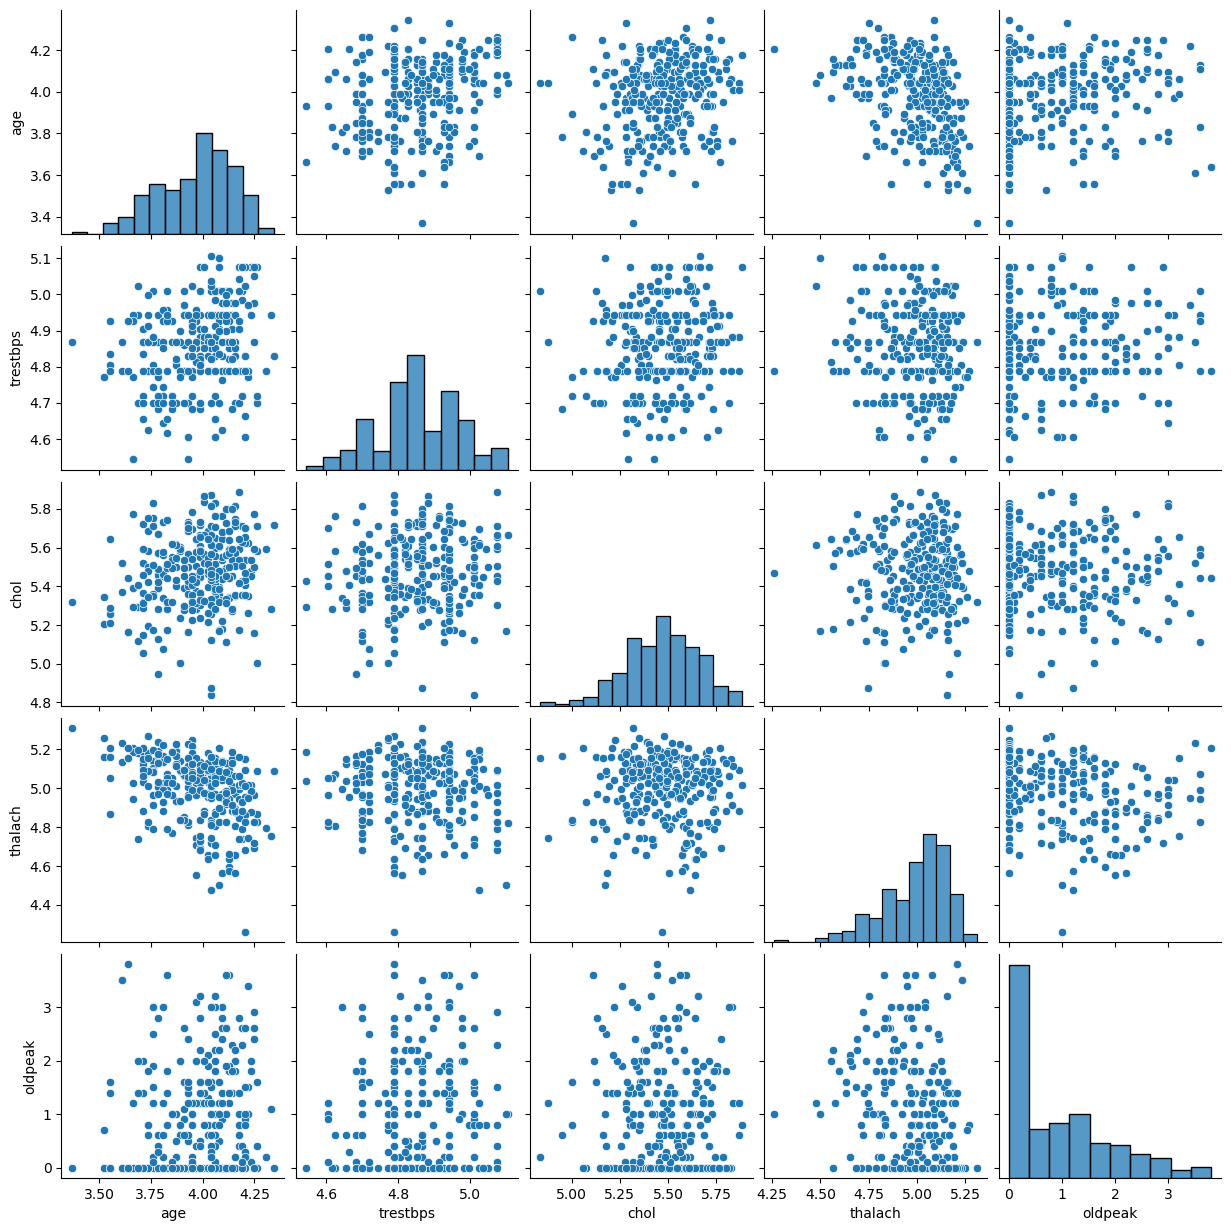

In [27]:
sns.pairplot(X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

<AxesSubplot:ylabel='Count'>

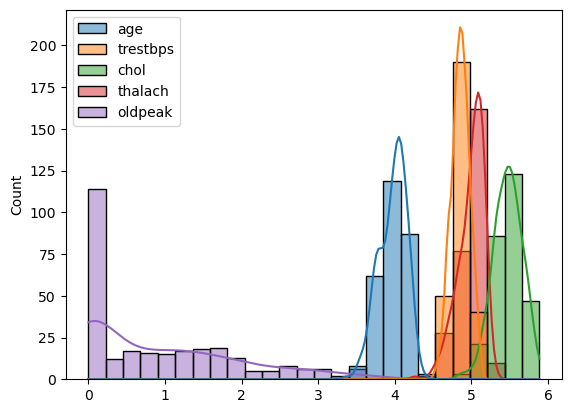

In [28]:
sns.histplot(data=X[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']], kde=True)

## Model Training
#### Splitting the data to training data & valid data

In [29]:
# X_ = X[imp_features.index[:9]]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                       stratify=y, random_state=2)

### 1. Create model


In [30]:
#model = RandomForestClassifier()

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

### 2. Validate model

In [32]:
print(mean_absolute_error(y_valid, y_pred))

0.16071428571428573


### 3. Evaluate model
#### Accuracy Score

In [33]:
print(f'Accuracy score of valid data= {accuracy_score(y_valid, y_pred)}')
y_train_pred = model.predict(X_train)
print(f'Accuracy score of training data= {accuracy_score(y_train, y_train_pred)}')

Accuracy score of valid data= 0.8392857142857143
Accuracy score of training data= 0.875


In [34]:
print(f'The valid score of valid data= {model.score(X_valid, y_valid)*100}%')
print(f'The train score of training data= {model.score(X_train, y_train)*100}%')

The valid score of valid data= 83.92857142857143%
The train score of training data= 87.5%


#### Performance Metric

In [35]:
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[20  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.87      0.84      0.86        32

    accuracy                           0.84        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.84      0.84      0.84        56



#### Precision and Recall

In [36]:
print(f'Precision= {precision_score(y_valid, y_pred)}')
print(f'Recall= {recall_score(y_valid, y_pred)}')

Precision= 0.8709677419354839
Recall= 0.84375


In [37]:
input_data = (57,1,0,140,192,0,1,148,0,0.4,1,0,1)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


In [38]:
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have a Heart Disease.")
else:
    print("The Person has Heart Disease.")  

[1]
The Person has Heart Disease.
